#Cutlets

In [1]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Cutlets.csv")
df

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [ ]:
Unit_A = df['Unit A'].dropna()

In [ ]:
Unit_B = df['Unit B'].dropna()

In [ ]:
sns.set_palette('bright')

In [ ]:
A_Unit = Unit_A.mean()
A_Unit

7.01909142857143

In [ ]:
B_Unit = Unit_B.mean()
B_Unit

6.964297142857142

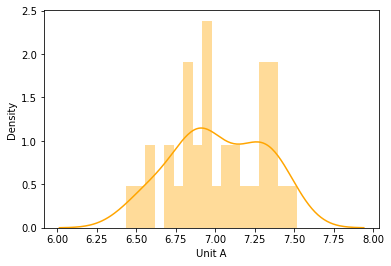

In [ ]:
sns.distplot(Unit_A,bins=18,color='orange')

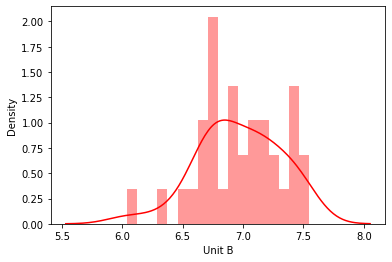

In [ ]:
sns.distplot(Unit_B,bins=18,color='red')

In [ ]:
t_value, p_value = sm.stats.ztest(df['Unit A'].dropna(),df['Unit B'].dropna(),alternative='two-sided')
t_value, p_value

(0.7228688704678061, 0.46976045023906077)

##As the P-value(0.46) is significantly high than alpha value(0.05) so there is difference in diameter of the cutlets from unit A and unit B

#Laboratory e.g

In [ ]:
Lab = pd.read_csv('LabTAT.csv') 
Lab

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


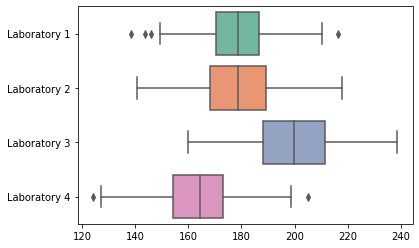

In [ ]:
ax = sns.boxplot(data=Lab, orient='h',palette='Set2')

In [ ]:
 stats.f_oneway(Lab.iloc[:,0],Lab.iloc[:,1],Lab.iloc[:,2],Lab.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

###P-Value is approximately zero so that we can conclude that there is not significant difference in the average turn around time of laboratories.

#Sales of Product Males and Female Ratio e.g

In [ ]:
sales = pd.read_csv('BuyerRatio.csv')
sales

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


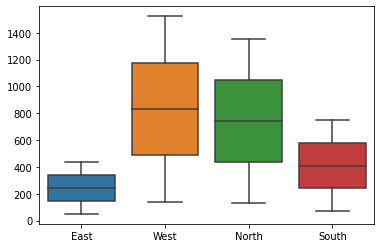

In [ ]:
sns.boxplot(data=sales)

In [ ]:
sales1=sales.drop(['Observed Values'],axis=1)
sales1

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [ ]:
male = pd.Series(sales1.iloc[0,:]).values

In [ ]:
female = pd.Series(sales1.iloc[1,:])

In [ ]:
sales2=[male,female]

In [ ]:
sales2

[array([ 50, 142, 131,  70]), East      435
 West     1523
 North    1356
 South     750
 Name: 1, dtype: int64]

In [ ]:
ChiStats = stats.chi2_contingency(sales2)

In [ ]:
print('T-Test=%f P-Value=%f' % (ChiStats[0],ChiStats[1]))

T-Test=1.595946 P-Value=0.660309


####As P-Value(0.66) is more than alpha value(0.05) so we failed to reject null Hypothesis.So the Male Female Buyer Ratio is not same across across every region. 

#Telecall e.g

In [ ]:
df = pd.read_csv('CostomerOrderForm.csv')
df

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [ ]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [ ]:
Phillippines_value=df['Phillippines'].value_counts()
Indonesia_value=df['Indonesia'].value_counts()
Malta_value=df['Malta'].value_counts()
India_value=df['India'].value_counts()

In [ ]:
Phillippines_value,Indonesia_value,Malta_value,India_value

(Error Free    271
 Defective      29
 Name: Phillippines, dtype: int64, Error Free    267
 Defective      33
 Name: Indonesia, dtype: int64, Error Free    269
 Defective      31
 Name: Malta, dtype: int64, Error Free    280
 Defective      20
 Name: India, dtype: int64)

In [ ]:
chistats = stats.chi2_contingency([[271,267,269,280],[29,33,31,20]])

In [ ]:
print('T-Test=%f P-Value=%f' % (chistats[0],chistats[1]))

T-Test=3.858961 P-Value=0.277102


###As P-Value(0.27) is greater than alpha(0.05) So that we failed to reject null hypothesis.So the defective %  varies by centre.

#Faltoons e.g

In [4]:
data = pd.read_csv('Faltoons.csv')
data

,Weekdays,Weekend
0,Male,Female
1,Female,Male
2,Female,Male
3,Male,Female
4,Female,Female
...,...,...
395,Female,Male
396,Female,Female
397,Female,Female
398,Female,Male


In [ ]:
data.describe()

,Weekdays,Weekend
count,400,400
unique,2,2
top,Female,Female
freq,287,233


In [ ]:
data1= data.groupby(['Weekdays','Weekend']).size()
data1

Weekdays  Weekend
Female    Female     167
          Male       120
Male      Female      66
          Male        47
dtype: int64

In [ ]:
ChiSquaretest = stats.chi2_contingency([[287,233],[113,167]])

In [ ]:
print('TestT =%f P-Value=%f' % (ChiSquaretest[0],ChiSquaretest[1]))

TestT =15.434066 P-Value=0.000085


###As P-value is approximate zero So we can reject null hypothesis. There is not significant difference in % of males and females walking on weekend and weekdays.
##The Proportion of female is greater than male.